In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, make_scorer, roc_curve, auc,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
import warnings
import seaborn as sns


In [2]:
warnings.filterwarnings('ignore')

# **INTRODUÇÃO**

No trabalho a seguir, utilizaremos uma base de dados de vinhos (brancos e tintos) e treinaremos modelos que possam prever se um vinho é bom ou ruim de acordo com suas características químicas.

Após o treinamento dos modelos seguindo as diretrizes do trabalho, os mesmos serão avaliados e um deles será adotado para testar sua generalização em outro modelo.

A base de dados será separada em vinhos branco e tintos. Os modelos serão treinados na base de vinhos brancos e o modelo escolhido será testado na base de vinhos tintos para auferir sua eficácia nesta nova base.

# **1. Comprovação de finalização do módulo Kaggle Intro to Machine Learning**

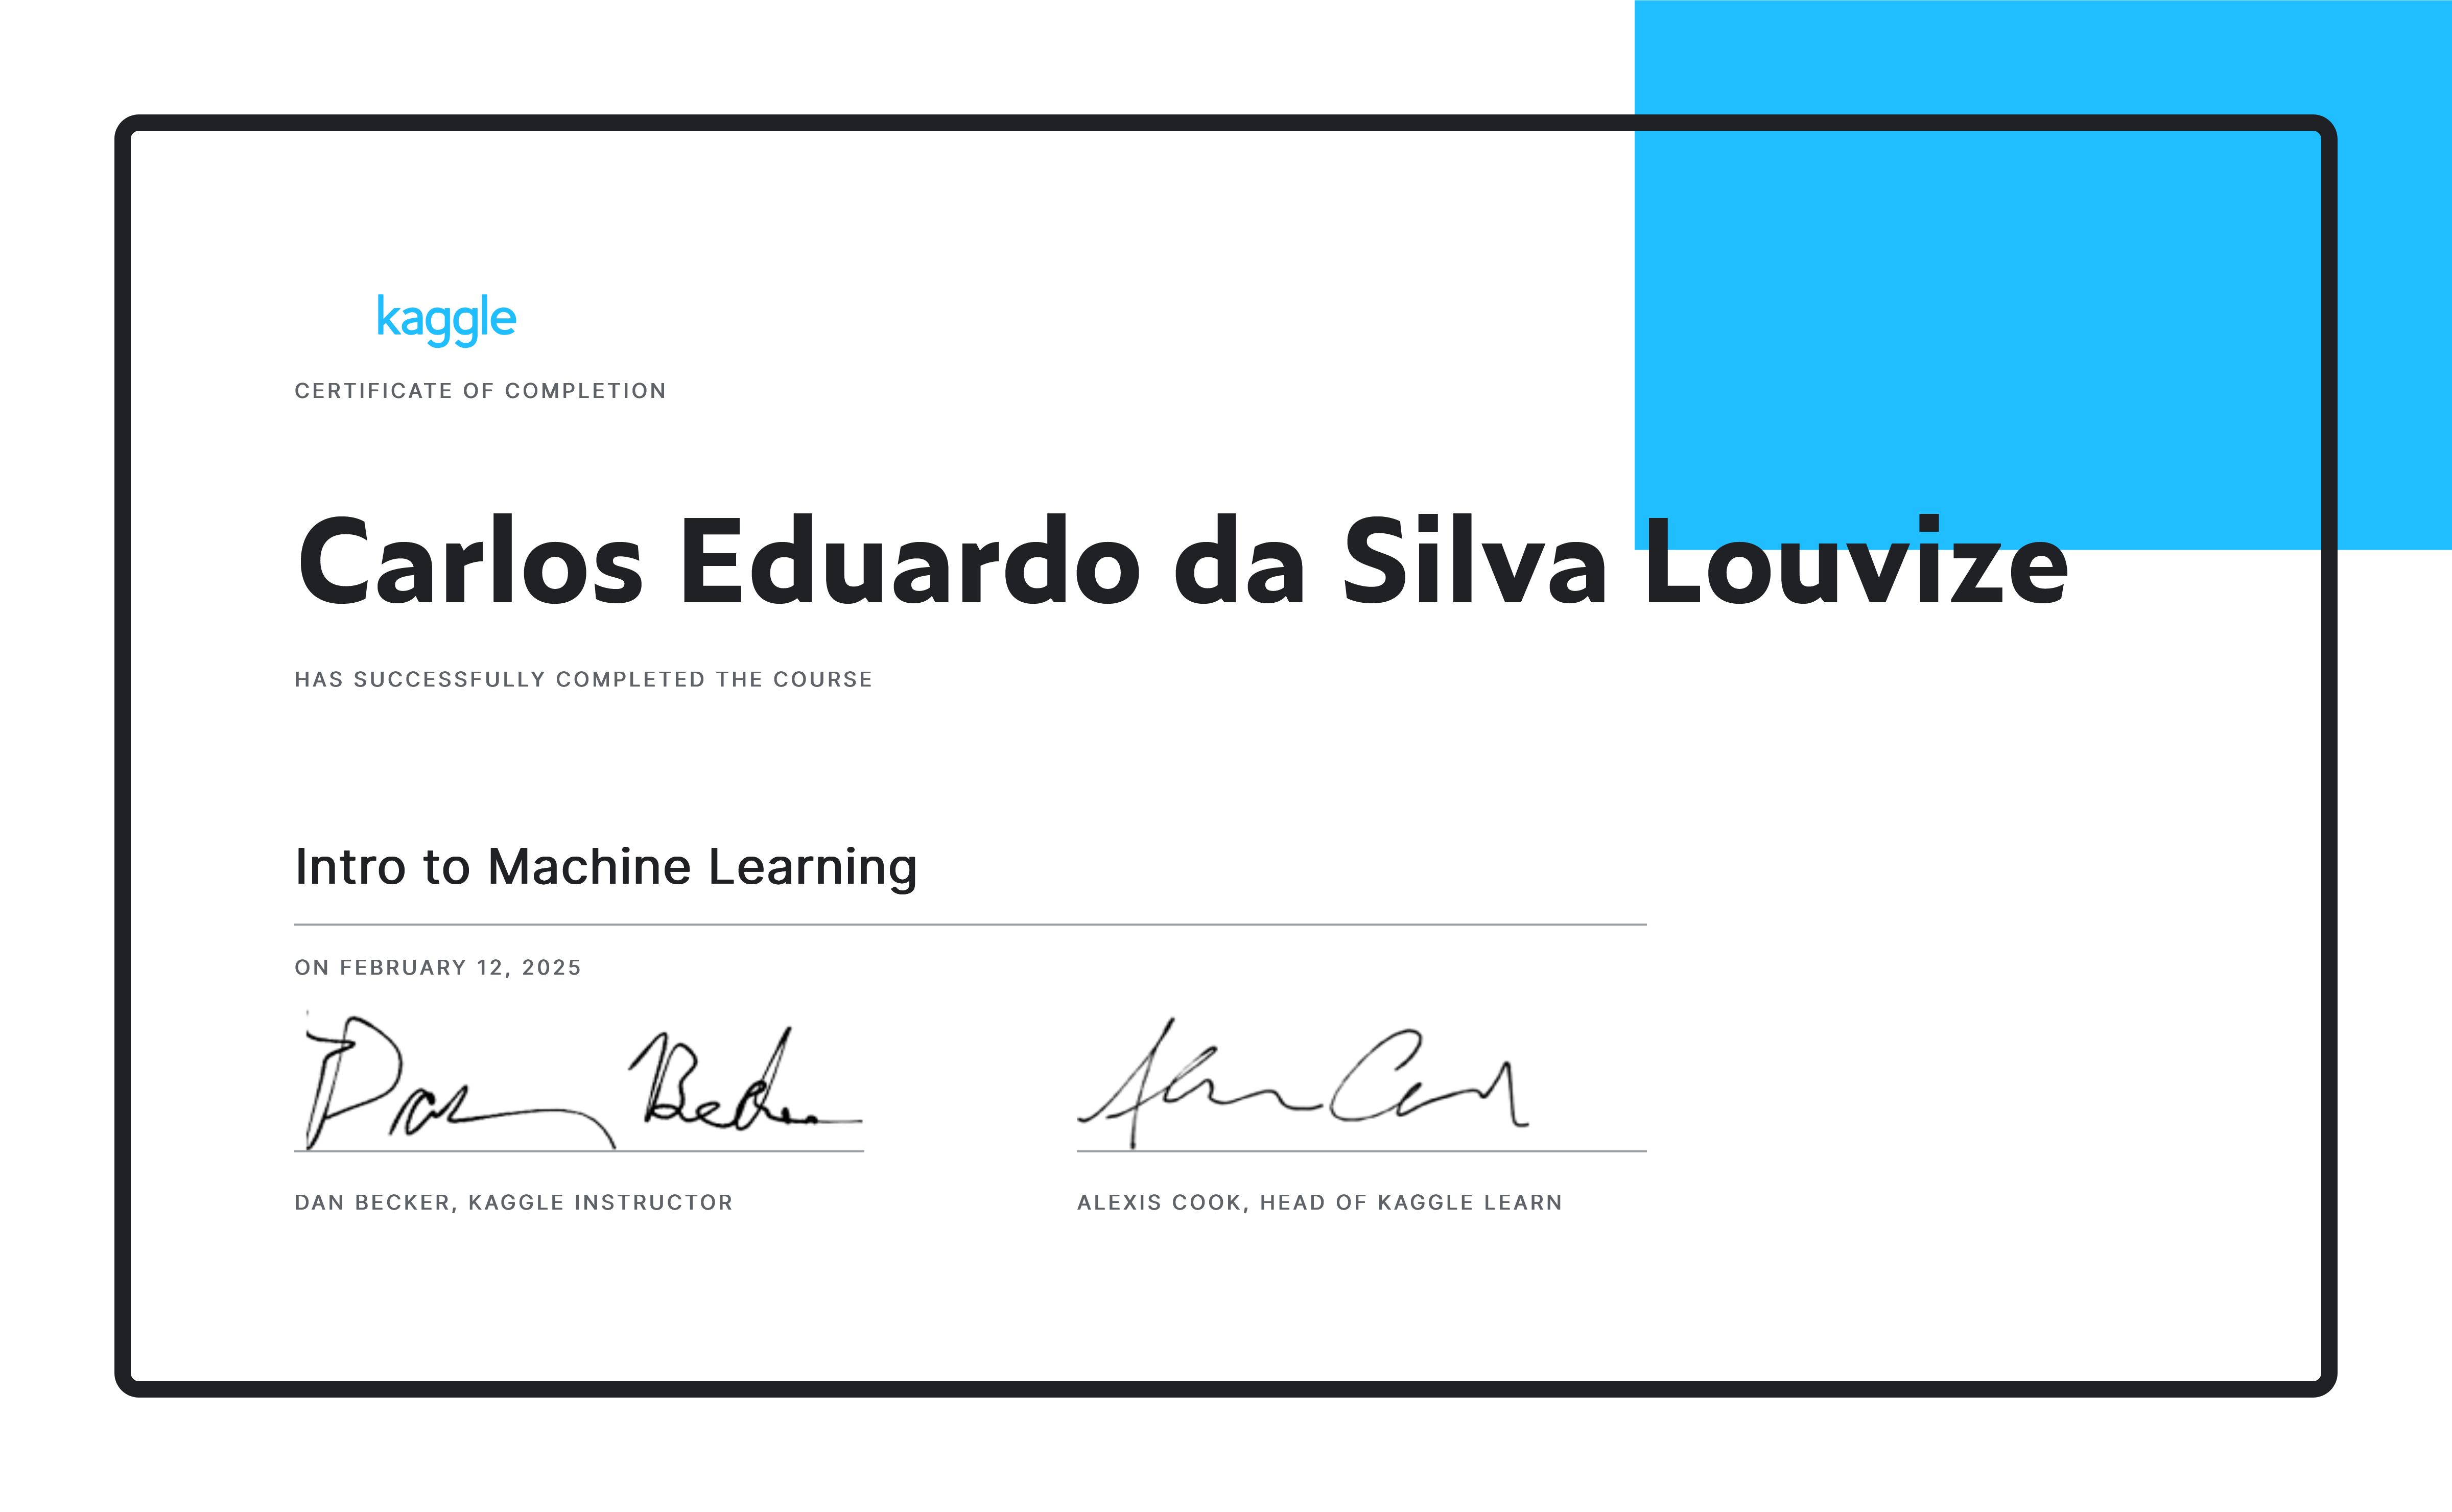

##**2. Montando drive que contém a base de dados**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**2.1. Lendo base de dados**

In [4]:
PATH = '/content/drive/MyDrive/01-POS/PD/winequalityN.csv'
database = pd.read_csv(PATH)

In [5]:
database.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## **2.2. Padronização da nomenclatura das variáveis**

In [6]:
database.columns = database.columns.str.lower().str.replace(' ', '_')
database.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


##**2.3. Selecionando dados 'quality'**

In [7]:
lista_quality = database['quality']
lista_quality.head()

,quality
0,6
1,6
2,6
3,6
4,6


##**2.4. Criando lista 'opinion'**

In [8]:
lista_opinion = [0 if valor <= 5 else 1 for valor in lista_quality]
lista_opinion[:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0]

##**2.5. Incluindo lista 'opinion' no dataframe**

In [9]:
database['opinion'] = lista_opinion
database.head(10)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,1


## **2.6. Criando base de dados sem a coluna "quality"**

In [10]:
data = database.drop('quality', axis=1)
data.head(10)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,1


## **2.7. Verificando balanceamento entre as classes "white" e "red"**

In [11]:
data['type'].value_counts(normalize=True)

,proportion
type,
white,0.753886
red,0.246114


*O enunciado já pedia a divisão da base de dados entre "white" e "red" no início.*

*Analisando o resultado da distribuição de tipos de vinho, verifica-se que é a melor decisão realmente.*


*O desbalanceamento entre as categorias poderia "puxar" os valores para a classe dominante (white) e enviesar os resultados durante o tratamento dos dados.*

*A exceção foi a criação da coluna "opinion" que não depende da distribuição de tipos de vinho.*

## **2.8. Separando a base de dados por "type" (White e red)**

In [12]:
data_red = data[data['type'] == 'red'].drop('type', axis=1)
data_white = data[data['type'] == 'white'].drop('type', axis=1)

## **2.9. Verificação das bases separadas**

In [13]:
data_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,opinion
4898,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
4899,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
4900,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
4901,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4902,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [14]:
data_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,opinion
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


# **3. Descrição das variáveis presentes na base**
(após criação de "opinion" e remoção de "quality")

## **3.1. As variáveis são:**

In [15]:
#Nomes das variáveis (colunas)
data_white.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'opinion'],
      dtype='object')

In [16]:
#Nomes das variáveis (colunas)
data_red.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'opinion'],
      dtype='object')

In [17]:
data_red.columns == data_white.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

## 3.2. Os tipos das variáveis são:



*  type - Variável categórica

*  fixed_acidity - Variável contínua

*  volatile_acidity - Variável contínua

*  citric_acid - Variável contínua

*  residual_sugar - Variável contínua

*  chlorides - Variável contínua

*  free_sulfur_dioxide - Variável discreta (apesar de ter casa decimal, os valores parecem ser sempre números inteiros)

*  total_sulfur_dioxide - Variável discreta (apesar de ter casa decimal, os valores parecem ser sempre números inteiros)

*  density - Variável contínua

*  ph - Variável contínua

*  sulphates - Variável contínua

*  alcohol - Variável contínua

*  opinion - Variável categórica (Apesar de ser representada por um valor numérico, a interpretação da informação é "Opinião negativa = 0" e "Opinião positiva = 1")







## **3.3. Verificação das médias e desvios padrão**

***A partir daqui todas as análises serão feitas com a base de vinhos brancos (type = "white"), exceto onde indicado de outra forma.***

In [18]:
data_white.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,opinion
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,0.665169
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [19]:
for column in data_white.columns:
  coluna = data_white[column]
  try:
    print(f'Desvio padrão da variável {column}: {coluna.std()}')
    print(f'Desvio média {column}: {coluna.mean()}')
    print('-----------------------------------------------------------')
  except:
    print(f'A variável {column} não é numérica')
    print('-----------------------------------------------------------')

Desvio padrão da variável fixed_acidity: 0.8438075744270377
Desvio média fixed_acidity: 6.855531697341513
-----------------------------------------------------------
Desvio padrão da variável volatile_acidity: 0.10081138482750772
Desvio média volatile_acidity: 0.2782518912287875
-----------------------------------------------------------
Desvio padrão da variável citric_acid: 0.12098510278902422
Desvio média citric_acid: 0.3342504084967321
-----------------------------------------------------------
Desvio padrão da variável residual_sugar: 5.072274662827127
Desvio média residual_sugar: 6.3932495915032685
-----------------------------------------------------------
Desvio padrão da variável chlorides: 0.0218499318231819
Desvio média chlorides: 0.045778390522875814
-----------------------------------------------------------
Desvio padrão da variável free_sulfur_dioxide: 17.007137325232566
Desvio média free_sulfur_dioxide: 35.30808493262556
-------------------------------------------------

# **4. Modelos de classificação**

## **4.1. Descrição das  etapas necessárias para criar um modelo de classificação eficiente**

***Durante a descrição das etapas, o procedimento já será aplicado às bases de vinho branco e vinho tinto.***

### **4.1.1. Tratamento dos dados**
A seção "Tratamento dos dados" comtemplará as duas bases ("white" e "red")

#### **4.1.1.1. Verificação de valores ausentes (NaN)**

In [20]:
data_white.isnull().sum()

,0
fixed_acidity,8
volatile_acidity,7
citric_acid,2
residual_sugar,2
chlorides,2
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
ph,7
sulphates,2


array([[<Axes: title={'center': 'fixed_acidity'}>,
        <Axes: title={'center': 'volatile_acidity'}>,
        <Axes: title={'center': 'citric_acid'}>],
       [<Axes: title={'center': 'residual_sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free_sulfur_dioxide'}>],
       [<Axes: title={'center': 'total_sulfur_dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'ph'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'opinion'}>]], dtype=object)

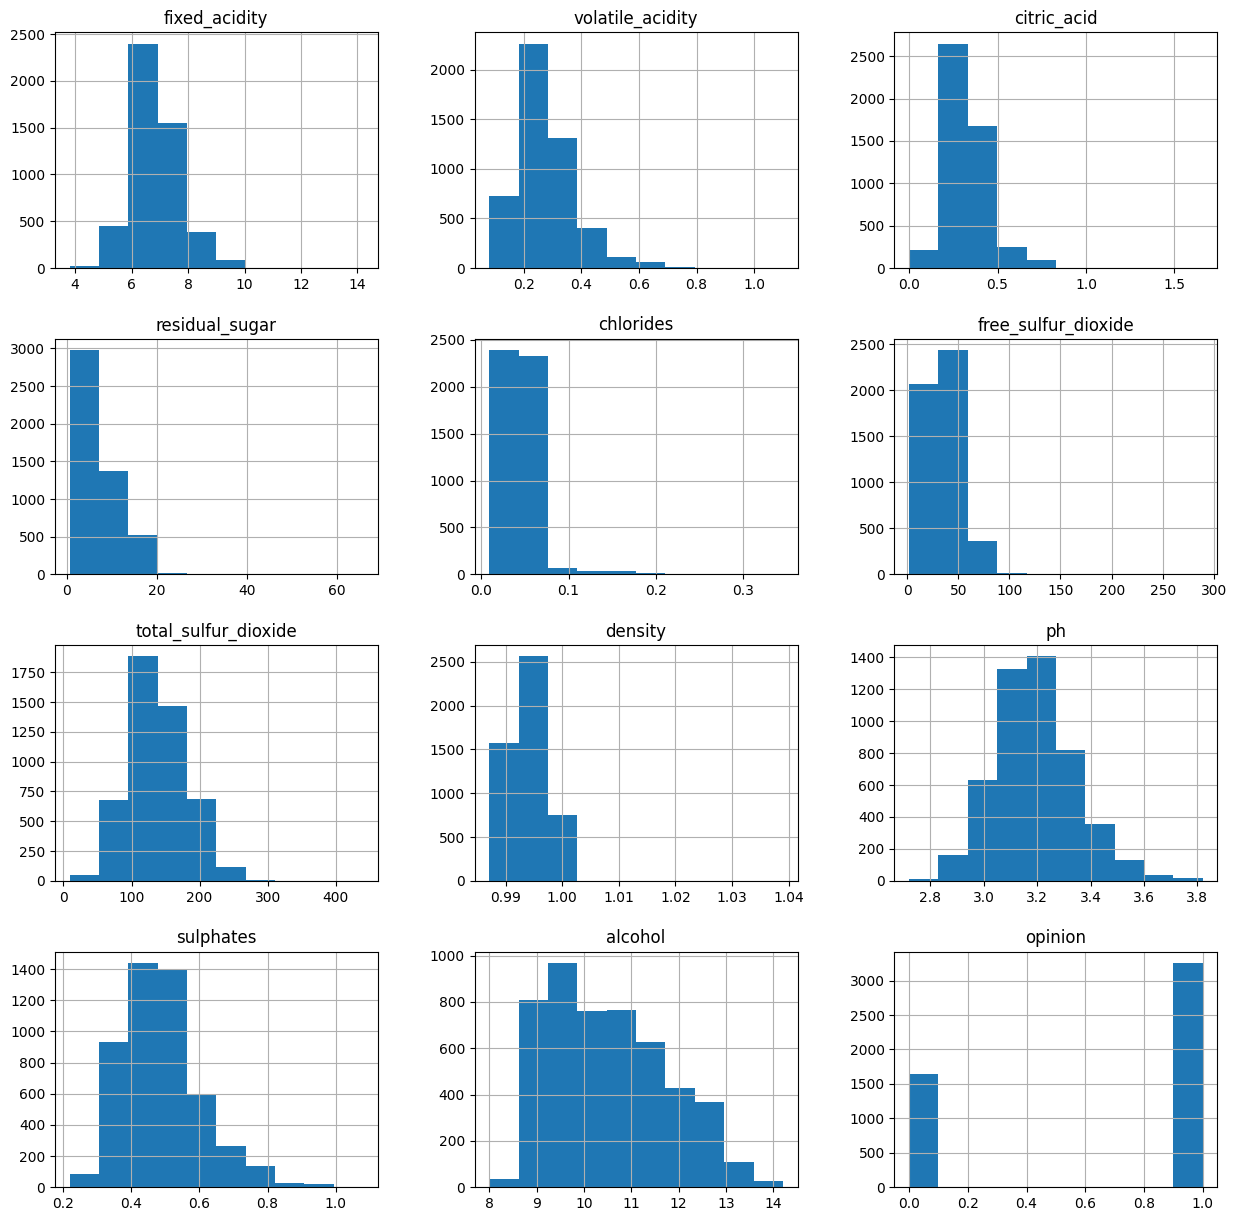

In [21]:
data_white.hist(figsize=(15,15))

In [117]:
#Varre todas as colunas substituindo NaN pele mediana.
for column in data_white.columns:
  coluna = data_white[column]
  try:
    coluna.fillna(coluna.median(), inplace=True)
  except:
    print(f'Não existem valores ausentes (NaN) na coluna {column}.')

In [23]:
data_white.isnull().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
ph,0
sulphates,0


In [24]:
data_red.isnull().sum()

,0
fixed_acidity,2
volatile_acidity,1
citric_acid,1
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
ph,2
sulphates,2


array([[<Axes: title={'center': 'fixed_acidity'}>,
        <Axes: title={'center': 'volatile_acidity'}>,
        <Axes: title={'center': 'citric_acid'}>],
       [<Axes: title={'center': 'residual_sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free_sulfur_dioxide'}>],
       [<Axes: title={'center': 'total_sulfur_dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'ph'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'opinion'}>]], dtype=object)

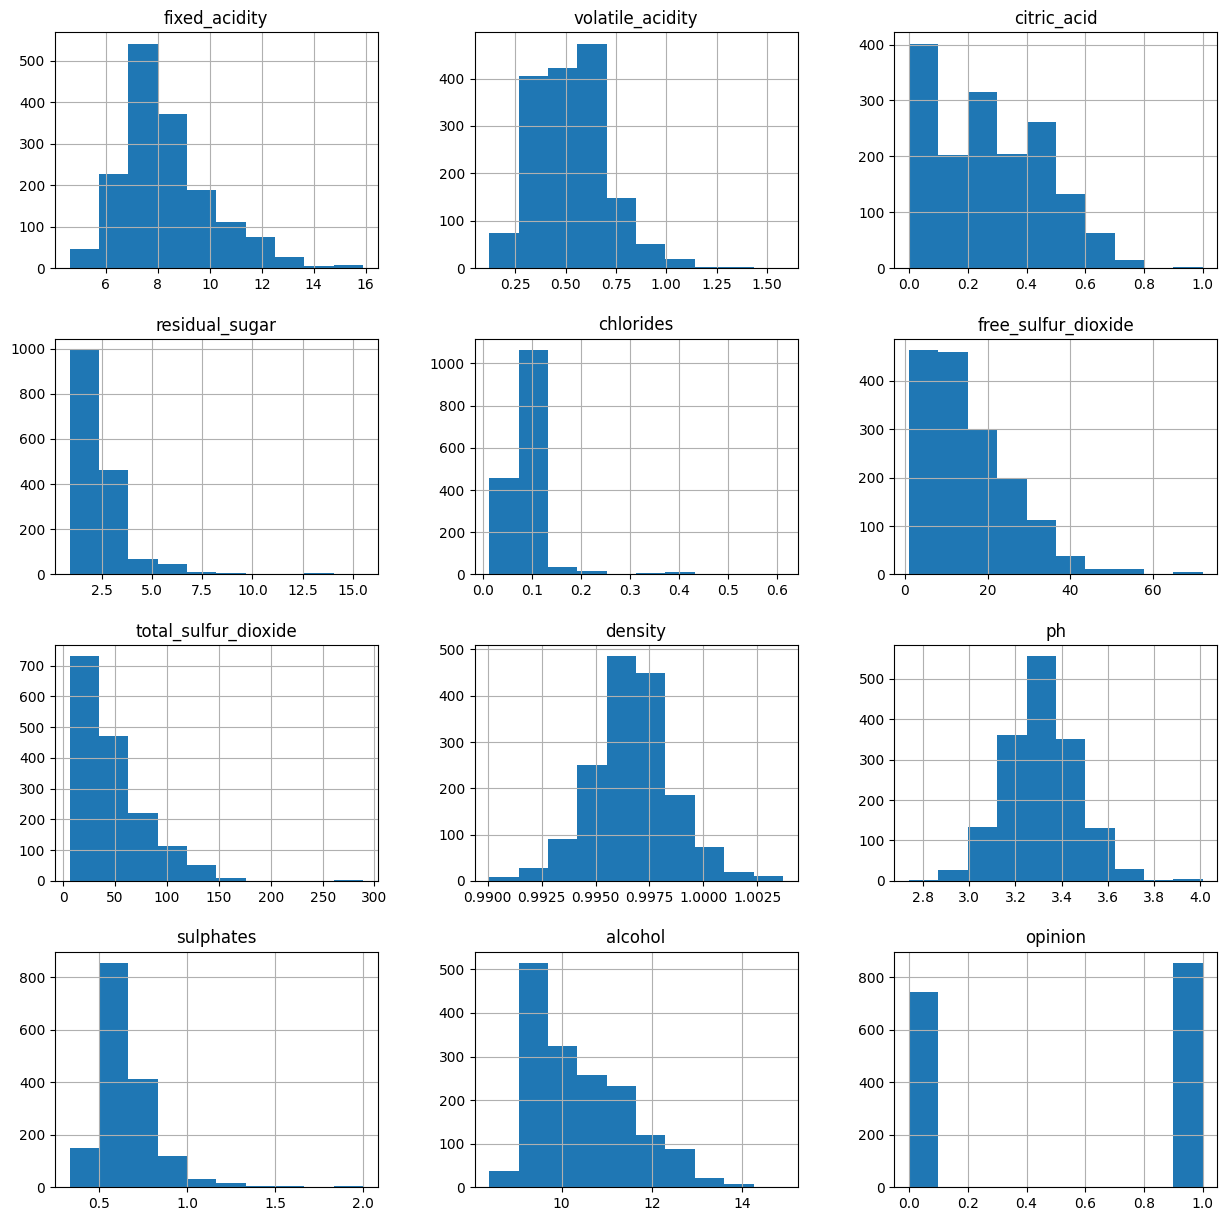

In [25]:
data_red.hist(figsize=(15,15))

In [118]:
#Varre todas as colunas substituindo NaN pele mediana.
for column in data_red.columns:
  coluna = data_red[column]
  try:
    coluna.fillna(coluna.median(), inplace=True)
  except:
    print(f'Não existem valores ausentes (NaN) na coluna {column}.')

In [119]:
data_red.isnull().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
ph,0
sulphates,0


#### **4.1.1.2. Remoção de duplicatas**

In [26]:
#verificando quantidade de duplicatas
data_white.duplicated().sum()

928

In [27]:
#removendo as duplicatas
data_white.drop_duplicates(inplace=True)

In [28]:
#verificando quantidade de duplicatas após a remoção
data_white.duplicated().sum()

0

In [29]:
#verificando quantidade de duplicatas
data_red.duplicated().sum()

240

In [120]:
#removendo as duplicatas
data_red.drop_duplicates(inplace=True)

In [121]:
#verificando quantidade de duplicatas após a remoção
data_red.duplicated().sum()

0

#### **4.1.1.3. Verificação da distribuição/balanceamento dos dados**

In [127]:
#verificando balanceamento pela coluna 'opinion' (nossa variável alvo)
porportions_white = data_white['opinion'].value_counts(normalize=True)
porportions_white

,proportion
opinion,
1,0.659698
0,0.340302


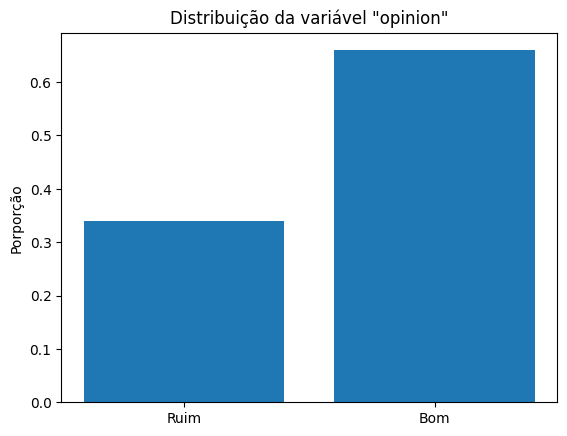

In [129]:
#visualização da distribuição da variável "opinion" na base de dados
plt.bar(x=porportions_white.index, height=porportions_white.values)
plt.xticks(ticks=[0,1], labels=['Ruim', 'Bom'])
plt.ylabel('Porporção')
plt.title('Distribuição da variável "opinion"')
plt.show()

In [122]:
#verificando balanceamento pela coluna 'opinion' (nossa variável alvo)
porportions_red = data_red['opinion'].value_counts(normalize=True)
porportions_red

,proportion
opinion,
1,0.529065
0,0.470935


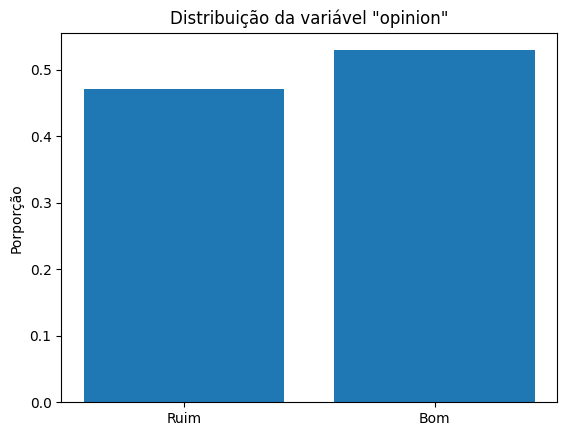

In [130]:
#visualização da distribuição da variável "opinion" na base de dados
plt.bar(x=porportions_red.index, height=porportions_red.values)
plt.xticks(ticks=[0,1], labels=['Ruim', 'Bom'])
plt.ylabel('Porporção')
plt.title('Distribuição da variável "opinion"')
plt.show()

## **4.2. Treinamento de um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação**

### **4.2.1. Cálculo da média e desvio da acurácia dos modelos obtidos**

#### **4.2.1.1. Separação de x e y**

In [34]:
x = data_white.drop(columns=['opinion'])
x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


In [35]:
y = data_white[['opinion']]
y.head()

,opinion
0,1
1,1
2,1
3,1
6,1


#### **4.2.1.2. Separação de treino e teste**

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)

props = pd.DataFrame(y.value_counts(normalize=True).values, columns=['original'])
props['train'] = y_train.value_counts(normalize=True).values
props['test'] = y_test.value_counts(normalize=True).values
props

,original,train,test
0,0.659698,0.663908,0.649874
1,0.340302,0.336092,0.350126


Podemos ver que o código acima resultou em classes de treino e teste com percentuais de amostras diferentes do conjunto original.

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13, stratify=y)

props = pd.DataFrame(y.value_counts(normalize=True).values, columns=['original'])
props['train'] = y_train.value_counts(normalize=True).values
props['test'] = y_test.value_counts(normalize=True).values
props

,original,train,test
0,0.659698,0.65959,0.65995
1,0.340302,0.34041,0.34005


Após aplicar a opção "stratify" (utilizando y como base), chegamos em um resultado mais adequado em que os comjuntos de dados de treino e teste tem amostras seguindo os percentuais da classe original.

Com isso damos mais consistência à análise e evitamos resultados tendenciosos/duvidosos em razãodo desbalanceamento das classes.

#### **4.2.1.3. Criação do baseline**

O baseline criado será "otimista" e considerará que todos os vinhos são considerados bons (opinion = 1)

In [38]:
y_baseline = np.repeat(1, repeats=len(y_test))
y_baseline

array([1, 1, 1, ..., 1, 1, 1])

As métricas do baseline são:

In [39]:
print(classification_report(y_test, y_baseline))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       405
           1       0.66      1.00      0.80       786

    accuracy                           0.66      1191
   macro avg       0.33      0.50      0.40      1191
weighted avg       0.44      0.66      0.52      1191



### **4.2.2. Treinamento do modelo de regressão logística**

In [40]:
# Primeiro modelo
rl1 = LogisticRegression(penalty=None).fit(x_train, y_train)

In [41]:
# Previsão do teste
yhat_rl1 = rl1.predict(x_test)

In [42]:
# Análise das métricas
print(classification_report(y_test, yhat_rl1))

              precision    recall  f1-score   support

           0       0.69      0.52      0.59       405
           1       0.78      0.88      0.83       786

    accuracy                           0.76      1191
   macro avg       0.73      0.70      0.71      1191
weighted avg       0.75      0.76      0.75      1191



In [43]:
# Previsão de probabilidades
yhat_rl1_proba = rl1.predict_proba(x_test)
yhat_rl1_proba

array([[0.24553586, 0.75446414],
       [0.08308742, 0.91691258],
       [0.41700327, 0.58299673],
       ...,
       [0.57209958, 0.42790042],
       [0.15623396, 0.84376604],
       [0.02668667, 0.97331333]])

In [44]:
x_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
655,7.7,0.27,0.35,5.3,0.030,30.0,117.0,0.99200,3.11,0.42,12.2
466,7.0,0.14,0.32,9.0,0.039,54.0,141.0,0.99560,3.22,0.43,9.4
1009,8.3,0.15,0.39,1.3,0.055,32.0,146.0,0.99300,3.08,0.39,10.5
2199,6.6,0.25,0.42,11.3,0.049,77.0,231.0,0.99660,3.24,0.52,9.5
2868,6.2,0.23,0.23,1.2,0.018,18.0,128.0,0.99178,3.05,0.28,10.6


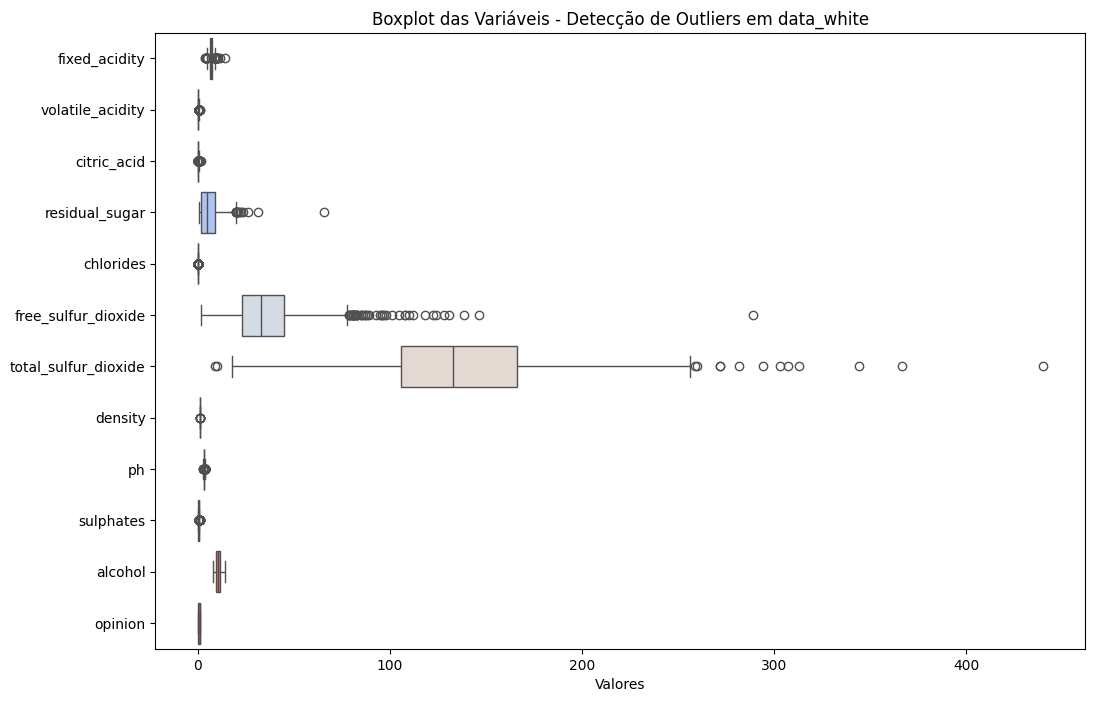

In [45]:
# Plotagem de boxplot's para iniciar a verificação da estratégia mais adequada de escalonamento
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_white, orient="h", palette="coolwarm")
plt.title("Boxplot das Variáveis - Detecção de Outliers em data_white")
plt.xlabel("Valores")
plt.show()

In [46]:
# Como algumas colunas têm muitos ouliers a estratégia escolhida foi RobustScaler, que é menos impactada pela presença de outliers.
RobustScaler().fit_transform(x_train)

array([[ 0.81818182,  0.08888889,  0.25      , ..., -0.36842105,
        -0.42857143,  0.94736842],
       [ 0.18181818, -1.06666667,  0.        , ...,  0.21052632,
        -0.35714286, -0.52631579],
       [ 1.36363636, -0.97777778,  0.58333333, ..., -0.52631579,
        -0.64285714,  0.05263158],
       ...,
       [ 0.18181818, -0.35555556,  0.        , ..., -1.05263158,
        -0.28571429,  0.05263158],
       [ 0.        , -0.44444444, -0.08333333, ..., -0.57894737,
         1.21428571,  0.26315789],
       [-0.27272727,  1.77777778, -0.66666667, ..., -0.52631579,
         0.57142857, -0.31578947]])

In [74]:
# Criando o Pipeline de modelagem
rl2 = Pipeline([('scaler', RobustScaler()), ('model', LogisticRegression(penalty=None, max_iter=1000, random_state=13, solver='saga'))])

# Configuração do espaço de busca
params_grid = {
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'lbfgs', 'saga'],
    'model__class_weight': [None, 'balanced']
}

# Configuração do amostrador de k folhas
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)

# Configuração do buscador
search_rl = GridSearchCV(estimator=rl2, param_grid=params_grid, cv=splitter, scoring='f1', refit=True, error_score=0)

# Treinamento do modelo
search_rl.fit(x_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=13, shuffle=True),
             error_score=0,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           penalty=None,
                                                           random_state=13,
                                                           solver='saga'))]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model__class_weight': [None, 'balanced'],
                         'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'model__solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='f1')

In [70]:
# Selecionando o melhor modelo encontrado
best_model = search_rl.best_estimator_


In [49]:
print(best_model)

Pipeline(steps=[('scaler', RobustScaler()),
                ('model',
                 LogisticRegression(C=0.1, max_iter=1000, random_state=13,
                                    solver='liblinear'))])


In [50]:
# Criando os scorers para cada métrica
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Realizando a validação cruzada novamente para capturar todas as métricas
accuracy_scores = cross_val_score(best_model, x_train, y_train, cv=splitter, scoring=scoring_metrics['accuracy'])
precision_scores = cross_val_score(best_model, x_train, y_train, cv=splitter, scoring=scoring_metrics['precision'])
recall_scores = cross_val_score(best_model, x_train, y_train, cv=splitter, scoring=scoring_metrics['recall'])
f1_scores = cross_val_score(best_model, x_train, y_train, cv=splitter, scoring=scoring_metrics['f1'])

# Cálculo da média e desvio-padrão para cada métrica
accuracy_mean, accuracy_std = np.mean(accuracy_scores), np.std(accuracy_scores)
precision_mean, precision_std = np.mean(precision_scores), np.std(precision_scores)
recall_mean, recall_std = np.mean(recall_scores), np.std(recall_scores)
f1_mean, f1_std = np.mean(f1_scores), np.std(f1_scores)

# Exibição dos resultados corrigidos
print(f"Acurácia - Média: {accuracy_mean:.4f}, Desvio: {accuracy_std:.4f}")
print(f"Precisão - Média: {precision_mean:.4f}, Desvio: {precision_std:.4f}")
print(f"Recall - Média: {recall_mean:.4f}, Desvio: {recall_std:.4f}")
print(f"F1-score - Média: {f1_mean:.4f}, Desvio: {f1_std:.4f}")

Acurácia - Média: 0.7503, Desvio: 0.0242
Precisão - Média: 0.7768, Desvio: 0.0162
Recall - Média: 0.8724, Desvio: 0.0300
F1-score - Média: 0.8216, Desvio: 0.0183


In [51]:
# Avaliação final na base de teste
y_pred_test = best_model.predict(x_test)
print(y_pred_test)

[1 1 1 ... 0 1 1]


In [73]:
# Pegando os valores das métricas durante a validação cruzada
acc_mean = search_rl.cv_results_['mean_test_score'].mean()
acc_std = search_rl.cv_results_['std_test_score'].mean()

# Calculando as métricas no conjunto de TESTE
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Exibindo os resultados
print(f'Acurácia - Média: {acc_mean:.4f}, Desvio: {acc_std:.4f}')
print(f'Precisão na base de TESTE: {precision_test:.4f}')
print(f'Recall na base de TESTE: {recall_test:.4f}')
print(f'F1-score na base de TESTE: {f1_test:.4f}')


Acurácia - Média: 0.3161, Desvio: 0.0106
Precisão na base de TESTE: 0.7770
Recall na base de TESTE: 0.8690
F1-score na base de TESTE: 0.8204


In [53]:
# Coletando dados para análise do desempenho final
yhat_rl2_train = best_model.predict(x_train)
yhat_rl2_test = best_model.predict(x_test)

In [54]:
# Desempenho final
print('====================\nBase de treino\n====================')
print(classification_report(y_train, yhat_rl2_train))
print('====================\nBase de testes\n====================')
print(classification_report(y_test, yhat_rl2_test))

Base de treino
              precision    recall  f1-score   support

           0       0.67      0.51      0.58       946
           1       0.78      0.87      0.82      1833

    accuracy                           0.75      2779
   macro avg       0.72      0.69      0.70      2779
weighted avg       0.74      0.75      0.74      2779

Base de testes
              precision    recall  f1-score   support

           0       0.67      0.52      0.58       405
           1       0.78      0.87      0.82       786

    accuracy                           0.75      1191
   macro avg       0.72      0.69      0.70      1191
weighted avg       0.74      0.75      0.74      1191



### **4.2.3. Treinamento do modelo de árvore de decisão**

In [55]:
# Criação do pipeline
dt_model = Pipeline([
    ('model', DecisionTreeClassifier(random_state=13))
])

# Configuração do espaço de busca
params_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': range(2, 11)
}

dt_search = GridSearchCV(estimator=dt_model, param_grid=params_grid, cv=splitter, scoring='accuracy', refit=True, error_score=0, verbose=10)

# Treinamento do modelo
dt_search.fit(x_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10; 1/18] START model__criterion=gini, model__max_depth=2.................
[CV 1/10; 1/18] END model__criterion=gini, model__max_depth=2;, score=0.773 total time=   0.0s
[CV 2/10; 1/18] START model__criterion=gini, model__max_depth=2.................
[CV 2/10; 1/18] END model__criterion=gini, model__max_depth=2;, score=0.727 total time=   0.0s
[CV 3/10; 1/18] START model__criterion=gini, model__max_depth=2.................
[CV 3/10; 1/18] END model__criterion=gini, model__max_depth=2;, score=0.683 total time=   0.0s
[CV 4/10; 1/18] START model__criterion=gini, model__max_depth=2.................
[CV 4/10; 1/18] END model__criterion=gini, model__max_depth=2;, score=0.727 total time=   0.0s
[CV 5/10; 1/18] START model__criterion=gini, model__max_depth=2.................
[CV 5/10; 1/18] END model__criterion=gini, model__max_depth=2;, score=0.755 total time=   0.0s
[CV 6/10; 1/18] START model__criterion=gini, model__max_d

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=13, shuffle=True),
             error_score=0,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeClassifier(random_state=13))]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': range(2, 11)},
             scoring='accuracy', verbose=10)

In [56]:
# Selecionando melhor combinação de parâmetros
dt_search.best_params_

{'model__criterion': 'gini', 'model__max_depth': 2}

In [62]:
# Verificando melhor desempenho médio
dt_search.best_score_

0.7384099940264395

In [58]:
# Obter previsões no conjunto de teste
y_pred_test_dt = dt_search.best_estimator_.predict(x_test)

# Cálculo das métricas no conjunto de TESTE
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)
precision_test_dt = precision_score(y_test, y_pred_test_dt)
recall_test_dt = recall_score(y_test, y_pred_test_dt)
f1_test_dt = f1_score(y_test, y_pred_test_dt)

# Exibir as métricas na base de TESTE
print(f'Acurácia na base de TESTE (DT): {accuracy_test_dt:.4f}')
print(f'Precisão na base de TESTE (DT): {precision_test_dt:.4f}')
print(f'Recall na base de TESTE (DT): {recall_test_dt:.4f}')
print(f'F1-score na base de TESTE (DT): {f1_test_dt:.4f}')

# Validação cruzada para capturar média e desvio das métricas
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

accuracy_scores_dt = cross_val_score(dt_search.best_estimator_, x_train, y_train, cv=splitter, scoring=scoring_metrics['accuracy'])
precision_scores_dt = cross_val_score(dt_search.best_estimator_, x_train, y_train, cv=splitter, scoring=scoring_metrics['precision'])
recall_scores_dt = cross_val_score(dt_search.best_estimator_, x_train, y_train, cv=splitter, scoring=scoring_metrics['recall'])
f1_scores_dt = cross_val_score(dt_search.best_estimator_, x_train, y_train, cv=splitter, scoring=scoring_metrics['f1'])

# Cálculo da média e desvio-padrão das métricas
accuracy_mean_dt, accuracy_std_dt = np.mean(accuracy_scores_dt), np.std(accuracy_scores_dt)
precision_mean_dt, precision_std_dt = np.mean(precision_scores_dt), np.std(precision_scores_dt)
recall_mean_dt, recall_std_dt = np.mean(recall_scores_dt), np.std(recall_scores_dt)
f1_mean_dt, f1_std_dt = np.mean(f1_scores_dt), np.std(f1_scores_dt)

# Exibição dos resultados
print(f"Acurácia - Média: {accuracy_mean_dt:.4f}, Desvio: {accuracy_std_dt:.4f}")
print(f"Precisão - Média: {precision_mean_dt:.4f}, Desvio: {precision_std_dt:.4f}")
print(f"Recall - Média: {recall_mean_dt:.4f}, Desvio: {recall_std_dt:.4f}")
print(f"F1-score - Média: {f1_mean_dt:.4f}, Desvio: {f1_std_dt:.4f}")


Acurácia na base de TESTE (DT): 0.7263
Precisão na base de TESTE (DT): 0.7431
Recall na base de TESTE (DT): 0.8944
F1-score na base de TESTE (DT): 0.8118
Acurácia - Média: 0.7384, Desvio: 0.0294
Precisão - Média: 0.7596, Desvio: 0.0198
Recall - Média: 0.8838, Desvio: 0.0478
F1-score - Média: 0.8163, Desvio: 0.0245


In [65]:
# Análise do desempenho final
yhat_dt_train = dt_search.best_estimator_.predict(x_train)
yhat_dt_test = dt_search.best_estimator_.predict(x_test)

# análise do desempenho
print('Desempenho - Base de Treino')
print(classification_report(y_train, yhat_dt_train))

print('Desempenho - Base de Teste')
print(classification_report(y_test, yhat_dt_test))


Desempenho - Base de Treino
              precision    recall  f1-score   support

           0       0.70      0.44      0.54       946
           1       0.76      0.90      0.82      1833

    accuracy                           0.74      2779
   macro avg       0.73      0.67      0.68      2779
weighted avg       0.74      0.74      0.73      2779

Desempenho - Base de Teste
              precision    recall  f1-score   support

           0       0.66      0.40      0.50       405
           1       0.74      0.89      0.81       786

    accuracy                           0.73      1191
   macro avg       0.70      0.65      0.66      1191
weighted avg       0.72      0.73      0.71      1191



### **4.2.4. Treinamento do modelo de SVM**

In [86]:
# Criação do pipeline
svm_model = Pipeline([
    ('model', SVC(random_state=13, probability=True))
])

# Configuração do espaço de busca
params_grid = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['rbf'],
    'model__gamma': ['scale', 'auto']
}

svm_search = GridSearchCV(estimator=svm_model, param_grid=params_grid, cv=splitter, scoring='accuracy', refit=True, error_score=0, verbose=10)

# Treinamento do modelo
svm_search.fit(x_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10; 1/6] START model__C=0.1, model__gamma=scale, model__kernel=rbf........
[CV 1/10; 1/6] END model__C=0.1, model__gamma=scale, model__kernel=rbf;, score=0.662 total time=   1.1s
[CV 2/10; 1/6] START model__C=0.1, model__gamma=scale, model__kernel=rbf........
[CV 2/10; 1/6] END model__C=0.1, model__gamma=scale, model__kernel=rbf;, score=0.662 total time=   1.1s
[CV 3/10; 1/6] START model__C=0.1, model__gamma=scale, model__kernel=rbf........
[CV 3/10; 1/6] END model__C=0.1, model__gamma=scale, model__kernel=rbf;, score=0.662 total time=   1.2s
[CV 4/10; 1/6] START model__C=0.1, model__gamma=scale, model__kernel=rbf........
[CV 4/10; 1/6] END model__C=0.1, model__gamma=scale, model__kernel=rbf;, score=0.658 total time=   1.9s
[CV 5/10; 1/6] START model__C=0.1, model__gamma=scale, model__kernel=rbf........
[CV 5/10; 1/6] END model__C=0.1, model__gamma=scale, model__kernel=rbf;, score=0.658 total time=   1.8s
[CV 6/10; 1/6]

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=13, shuffle=True),
             error_score=0,
             estimator=Pipeline(steps=[('model',
                                        SVC(probability=True,
                                            random_state=13))]),
             param_grid={'model__C': [0.1, 1, 10],
                         'model__gamma': ['scale', 'auto'],
                         'model__kernel': ['rbf']},
             scoring='accuracy', verbose=10)

In [87]:
svm_search.best_params_

{'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'rbf'}

In [88]:
svm_search.best_score_

0.6703932161130302

In [89]:
# Obter previsões no conjunto de teste
y_pred_test_svm = svm_search.best_estimator_.predict(x_test)

# Cálculo das métricas no conjunto de TESTE
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
precision_test_svm = precision_score(y_test, y_pred_test_svm)
recall_test_svm = recall_score(y_test, y_pred_test_svm)
f1_test_svm = f1_score(y_test, y_pred_test_svm)

# Exibir as métricas na base de TESTE
print(f'Acurácia na base de TESTE (svm): {accuracy_test_svm:.4f}')
print(f'Precisão na base de TESTE (svm): {precision_test_svm:.4f}')
print(f'Recall na base de TESTE (svm): {recall_test_svm:.4f}')
print(f'F1-score na base de TESTE (svm): {f1_test_svm:.4f}')

# Validação cruzada para capturar média e desvio das métricas
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

accuracy_scores_svm = cross_val_score(svm_search.best_estimator_, x_train, y_train, cv=splitter, scoring=scoring_metrics['accuracy'])
precision_scores_svm = cross_val_score(svm_search.best_estimator_, x_train, y_train, cv=splitter, scoring=scoring_metrics['precision'])
recall_scores_svm = cross_val_score(svm_search.best_estimator_, x_train, y_train, cv=splitter, scoring=scoring_metrics['recall'])
f1_scores_svm = cross_val_score(svm_search.best_estimator_, x_train, y_train, cv=splitter, scoring=scoring_metrics['f1'])

# Cálculo da média e desvio-padrão das métricas
accuracy_mean_svm, accuracy_std_svm = np.mean(accuracy_scores_svm), np.std(accuracy_scores_svm)
precision_mean_svm, precision_std_svm = np.mean(precision_scores_svm), np.std(precision_scores_svm)
recall_mean_svm, recall_std_svm = np.mean(recall_scores_svm), np.std(recall_scores_svm)
f1_mean_svm, f1_std_svm = np.mean(f1_scores_svm), np.std(f1_scores_svm)

# Exibição dos resultados
print(f"Acurácia - Média: {accuracy_mean_svm:.4f}, Desvio: {accuracy_std_svm:.4f}")
print(f"Precisão - Média: {precision_mean_svm:.4f}, Desvio: {precision_std_svm:.4f}")
print(f"Recall - Média: {recall_mean_svm:.4f}, Desvio: {recall_std_svm:.4f}")
print(f"F1-score - Média: {f1_mean_svm:.4f}, Desvio: {f1_std_svm:.4f}")

Acurácia na base de TESTE (svm): 0.6801
Precisão na base de TESTE (svm): 0.6930
Recall na base de TESTE (svm): 0.9249
F1-score na base de TESTE (svm): 0.7924
Acurácia - Média: 0.6704, Desvio: 0.0091
Precisão - Média: 0.6798, Desvio: 0.0059
Recall - Média: 0.9460, Desvio: 0.0242
F1-score - Média: 0.7910, Desvio: 0.0079


In [90]:
# Análise do desempenho final
yhat_svm_train = svm_search.best_estimator_.predict(x_train)
yhat_svm_test = svm_search.best_estimator_.predict(x_test)

# análise do desempenho
print('Desempenho - Base de Treino')
print(classification_report(y_train, yhat_svm_train))

print('Desempenho - Base de Teste')
print(classification_report(y_test, yhat_svm_test))

Desempenho - Base de Treino
              precision    recall  f1-score   support

           0       0.60      0.19      0.29       946
           1       0.69      0.94      0.79      1833

    accuracy                           0.68      2779
   macro avg       0.65      0.56      0.54      2779
weighted avg       0.66      0.68      0.62      2779

Desempenho - Base de Teste
              precision    recall  f1-score   support

           0       0.58      0.20      0.30       405
           1       0.69      0.92      0.79       786

    accuracy                           0.68      1191
   macro avg       0.64      0.56      0.55      1191
weighted avg       0.66      0.68      0.63      1191



# **5. Comparação dos modelos e curva ROC média**

In [91]:
# criando um vetor de probabilidades
prob_min = np.linspace(0.01, 0.99, 99)

# Obter previsões de probabilidade para cada modelo
prob_test_rl = search_rl.predict_proba(x_test)
FP_rl =[]
FN_rl = []

prob_test_dt = dt_search.predict_proba(x_test)
FP_dt =[]
FN_dt = []

prob_test_svm = svm_search.predict_proba(x_test)
FP_svm =[]
FN_svm = []

for p in prob_min:

  # calcular o vetor de classes
  yhat_rl = [1 if c[1] > p else 0 for c in prob_test_rl]
  yhat_dt = [1 if c[1] > p else 0 for c in prob_test_dt]
  yhat_svm = [1 if c[1] > p else 0 for c in prob_test_svm]

  # calcular a matriz de confusão
  mc_rl = confusion_matrix(y_test, yhat_rl)
  mc_dt = confusion_matrix(y_test, yhat_dt)
  mc_svm = confusion_matrix(y_test, yhat_svm)

  # adiciono nas listas
  FP_rl.append(mc_rl[0, 1] / y_test.shape[0])
  FN_rl.append(mc_rl[1, 0] / y_test.shape[0])
  FP_dt.append(mc_dt[0, 1] / y_test.shape[0])
  FN_dt.append(mc_dt[1, 0] / y_test.shape[0])
  FP_svm.append(mc_svm[0, 1] / y_test.shape[0])
  FN_svm.append(mc_svm[1, 0] / y_test.shape[0])

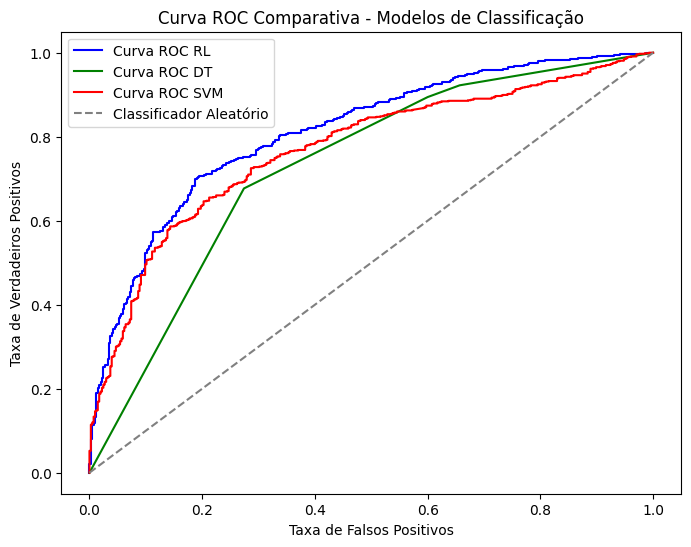

In [98]:
fpr_rl, tpr_rl, _ = roc_curve(y_test, [c[1] for c in prob_test_rl])
fpr_dt, tpr_dt, _ = roc_curve(y_test, [c[1] for c in prob_test_dt])
fpr_svm, tpr_svm, _ = roc_curve(y_test, [c[1] for c in prob_test_svm])

plt.figure(figsize=(8, 6))
plt.plot(fpr_rl, tpr_rl, label='Curva ROC RL', color='blue')
plt.plot(fpr_dt, tpr_dt, label='Curva ROC DT', color='green')
plt.plot(fpr_svm, tpr_svm, label='Curva ROC SVM', color='red')
plt.plot([0, 1], [0, 1], label='Classificador Aleatório', color='gray', linestyle='--')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC Comparativa - Modelos de Classificação')
plt.show()

In [102]:
# métrica de avalição rápida da ROC
print('Área abaixo da curva - AUC ROC RL: ', roc_auc_score(y_test, [c[1] for c in prob_test_rl]))
print('Área abaixo da curva - AUC ROC DT: ', roc_auc_score(y_test, [c[1] for c in prob_test_dt]))
print('Área abaixo da curva - AUC ROC SVM: ', roc_auc_score(y_test, [c[1] for c in prob_test_svm]))

Área abaixo da curva - AUC ROC RL:  0.8116294411459805
Área abaixo da curva - AUC ROC DT:  0.7302877517042063
Área abaixo da curva - AUC ROC SVM:  0.7700766500172778


## **5.1. Escolha do modelo mais adequado e justificativa**

De acordo com o gráfico exibido acima (curva ROC ds modelos), verifica-se que o modelo mais adequado é o de Regressão Logística.

Isso se deve ao fato de que sua curva (na cor azul) está acima das outras na maior arte do gráfico, indicando melhor desempenho geral.

De acordo com o observado no gráfico, o modelo de Regressão Logística faz melhores decisões do que os outros modelos.

Nota-se também que o maior AUC é o do modelo de Regressão Logística.

# **6. Aplicação do modelo escolhido (RL) na base de vinhos tintos**

In [114]:
data_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,opinion
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1


In [115]:
data_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,opinion
4898,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
4899,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
4900,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
4901,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4902,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [134]:
# Fazer a inferência nos vinhos tintos utilizando o modelo treinado anteriormente (sem re-treinar com novos dados)
x_red = data_red.drop(columns=['opinion'])
y_pred_red = best_model.predict(x_red)

y_pred_red

array([0, 0, 0, ..., 1, 0, 1])

In [137]:
# Fazer a inferência nos vinhos tintos
y_true_red = data_red['opinion']

# Calcular métricas de desempenho
accuracy_red = accuracy_score(y_true_red, y_pred_red)
precision_red = precision_score(y_true_red, y_pred_red)
recall_red = recall_score(y_true_red, y_pred_red)
f1_red = f1_score(y_true_red, y_pred_red)

# Exibir relatório de classificação detalhado
print("Desempenho do Modelo nos Vinhos Tintos:")
print(classification_report(y_true_red, y_pred_red))

# Exibir as métricas
print(f"Acurácia: {accuracy_red:.4f}")
print(f"Precisão: {precision_red:.4f}")
print(f"Recall: {recall_red:.4f}")
print(f"F1-score: {f1_red:.4f}")

Desempenho do Modelo nos Vinhos Tintos:
              precision    recall  f1-score   support

           0       0.60      0.92      0.73       640
           1       0.87      0.45      0.60       719

    accuracy                           0.67      1359
   macro avg       0.73      0.69      0.66      1359
weighted avg       0.74      0.67      0.66      1359

Acurácia: 0.6740
Precisão: 0.8651
Recall: 0.4548
F1-score: 0.5962


## **6.1. Comparação dos resultados das duas bases (Brancos x Tintos)**

In [139]:
print('====================\nBase de testes (Vinhos brancos)\n====================')
print(classification_report(y_test, yhat_rl2_test))

print("====================\nDesempenho do Modelo nos Vinhos Tintos:\n====================")
print(classification_report(y_true_red, y_pred_red))

Base de testes (Vinhos brancos)
              precision    recall  f1-score   support

           0       0.67      0.52      0.58       405
           1       0.78      0.87      0.82       786

    accuracy                           0.75      1191
   macro avg       0.72      0.69      0.70      1191
weighted avg       0.74      0.75      0.74      1191

Desempenho do Modelo nos Vinhos Tintos:
              precision    recall  f1-score   support

           0       0.60      0.92      0.73       640
           1       0.87      0.45      0.60       719

    accuracy                           0.67      1359
   macro avg       0.73      0.69      0.66      1359
weighted avg       0.74      0.67      0.66      1359



O modelo esolhido (RL) treinado na base de vinhos brancos não performou tão bem com os vinhos tintos.

Pela diminuição da acurácia, pode-se entender que o modelo foi mais eficaz na classificação de vinhos brancos. A generalização para vinhos tintos não foi tão boa.

Por outro lado, o recall da classe 0 (vinhos ruins) nos vinhos tintos subiu bastante (de 52% nos brancos para 92%). Isso indica que a maioria dos vinhos tintos ruins foi detectada.

Em contrapartida, a detecção de vinhos bons caiu de qualidade (de 87% nos vinhos brancos para 45% nos tintos). Dessa forma, pode-se entender que muitos vinhos bons estão sendo classificados como ruins.

A precisão da classe 1 (vinhos bons) é alta nos vinhos tintos. À partir dessa informação, entendemos que o modelo acerta na maioria das vezes ao dizer que um vinho é bom.

O F1-Score da classe 1 (vinhos bons) também caiu para os vinhos tintos (de 82% para 60%). O modelo não consegue equilibrar bem a preciso e o recall para vinhos bons.

Em vista de todas essas informações, podemos entender que o modelo treinado não se saiu tão bem com vinhos tintos como se saiu com vinhos brancos. O modelo está enviesado para vinhos brancos.

# **7. Diferença entre Regressão Linear e Regressão Logística**



*   Regressão Linear é utilizada para resolver problemas que envolvem valores contínuos.
*   Regressão Logística é utilizada para resolver problemas de classificação (como classes que assumem valores 0 ou 1)

